In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('Bitcoin prices.csv')

Data analysis

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600


In [5]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3120,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
3121,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
3122,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380
3123,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497
3124,2023-04-08,27923.234375,28158.269531,27887.365234,28032.187500,28032.187500,9243753472


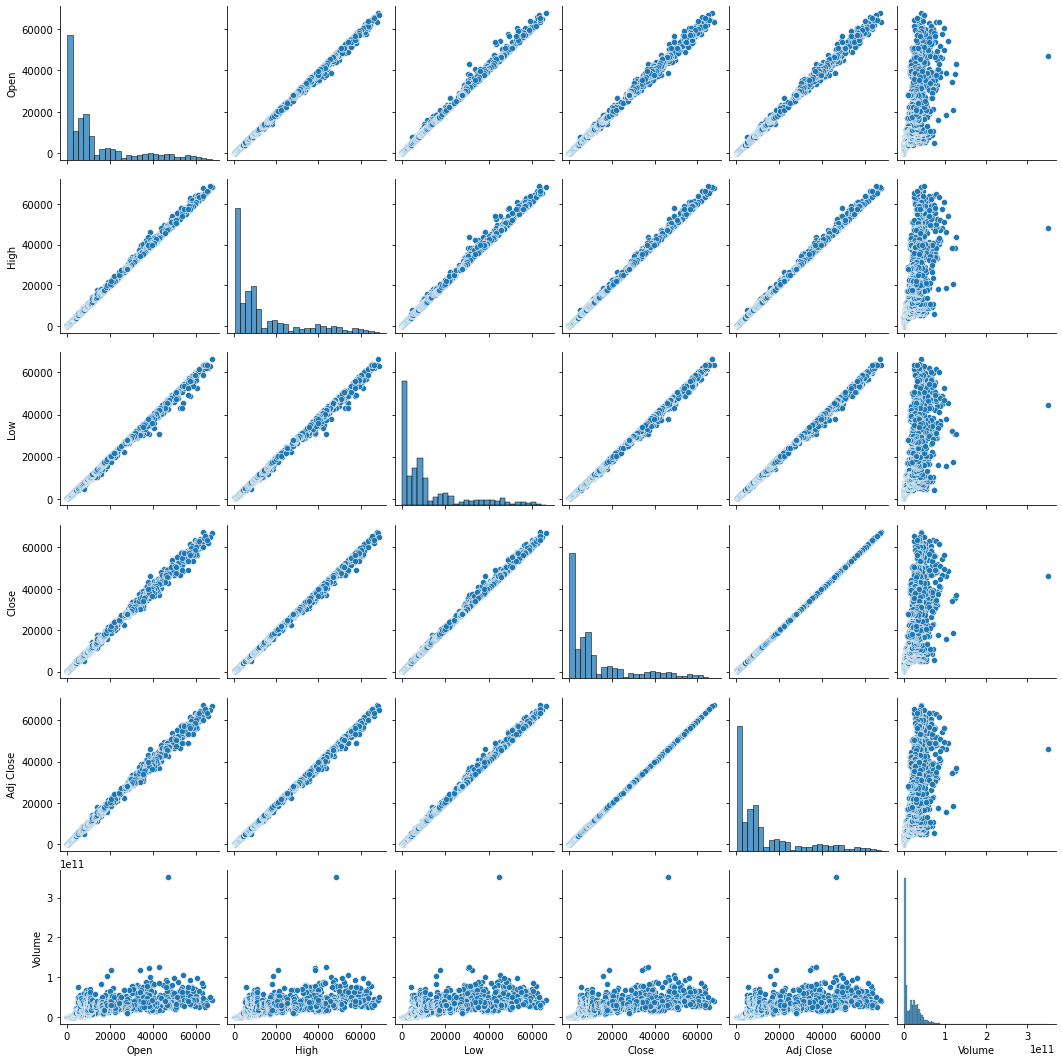

In [6]:
sns.pairplot(dataset)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3125 non-null   object 
 1   Open       3125 non-null   float64
 2   High       3125 non-null   float64
 3   Low        3125 non-null   float64
 4   Close      3125 non-null   float64
 5   Adj Close  3125 non-null   float64
 6   Volume     3125 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 171.0+ KB


In [8]:
dataset = dataset.set_index('Date')
dataset.index = pd.to_datetime(dataset.index)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3125 entries, 2014-09-18 to 2023-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3125 non-null   float64
 1   High       3125 non-null   float64
 2   Low        3125 non-null   float64
 3   Close      3125 non-null   float64
 4   Adj Close  3125 non-null   float64
 5   Volume     3125 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.9 KB


In [10]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600


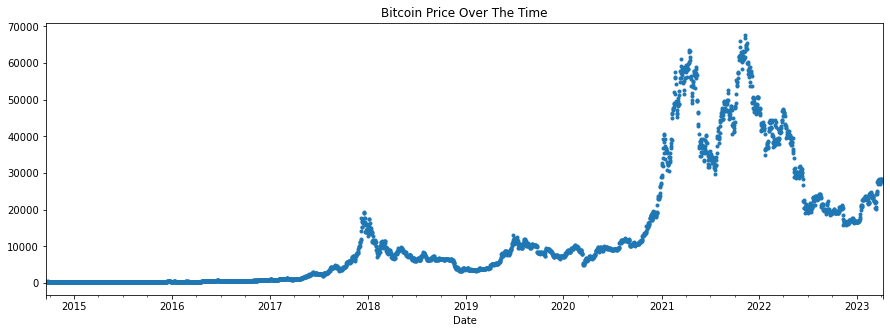

In [11]:
dataset['Open'].plot(style='.',
        figsize=(15, 5), 
        title='Bitcoin Price Over The Time')
plt.show()

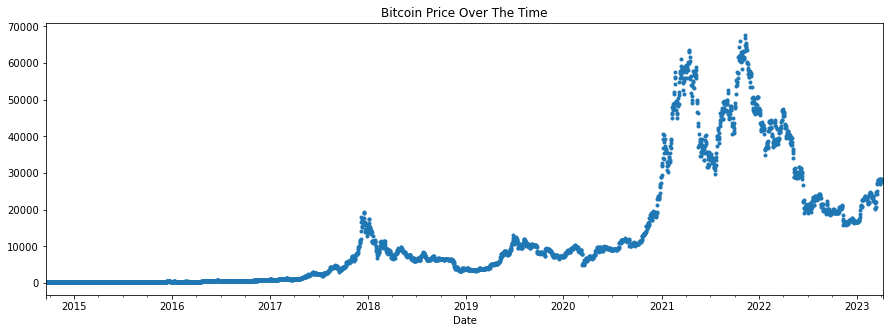

In [12]:
dataset['Adj Close'].plot(style='.',
        figsize=(15, 5), 
        title='Bitcoin Price Over The Time')
plt.show()

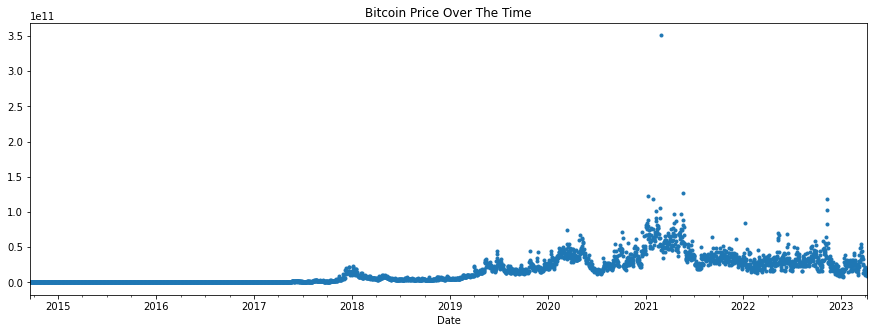

In [13]:
dataset['Volume'].plot(style='.',
        figsize=(15, 5), 
        title='Bitcoin Price Over The Time')
plt.show()

<AxesSubplot:ylabel='Frequency'>

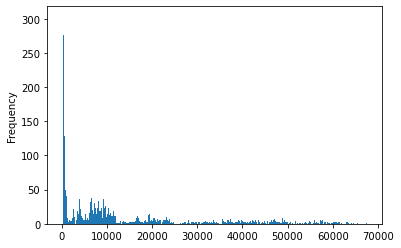

In [14]:
dataset['Close'].plot(kind='hist', bins=500)

<AxesSubplot:ylabel='Frequency'>

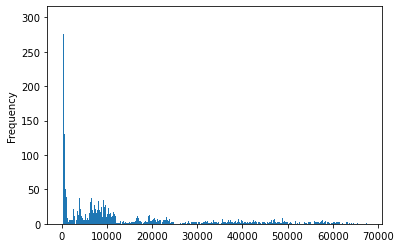

In [15]:
dataset['Open'].plot(kind='hist', bins=500)

In [16]:
dataset['Close'] = np.log1p(dataset['Close'])

<AxesSubplot:ylabel='Frequency'>

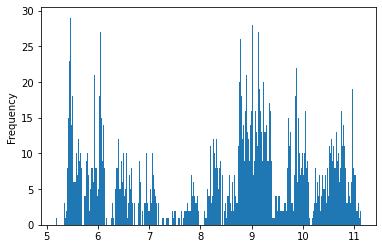

In [17]:
dataset['Close'].plot(kind='hist', bins=500)

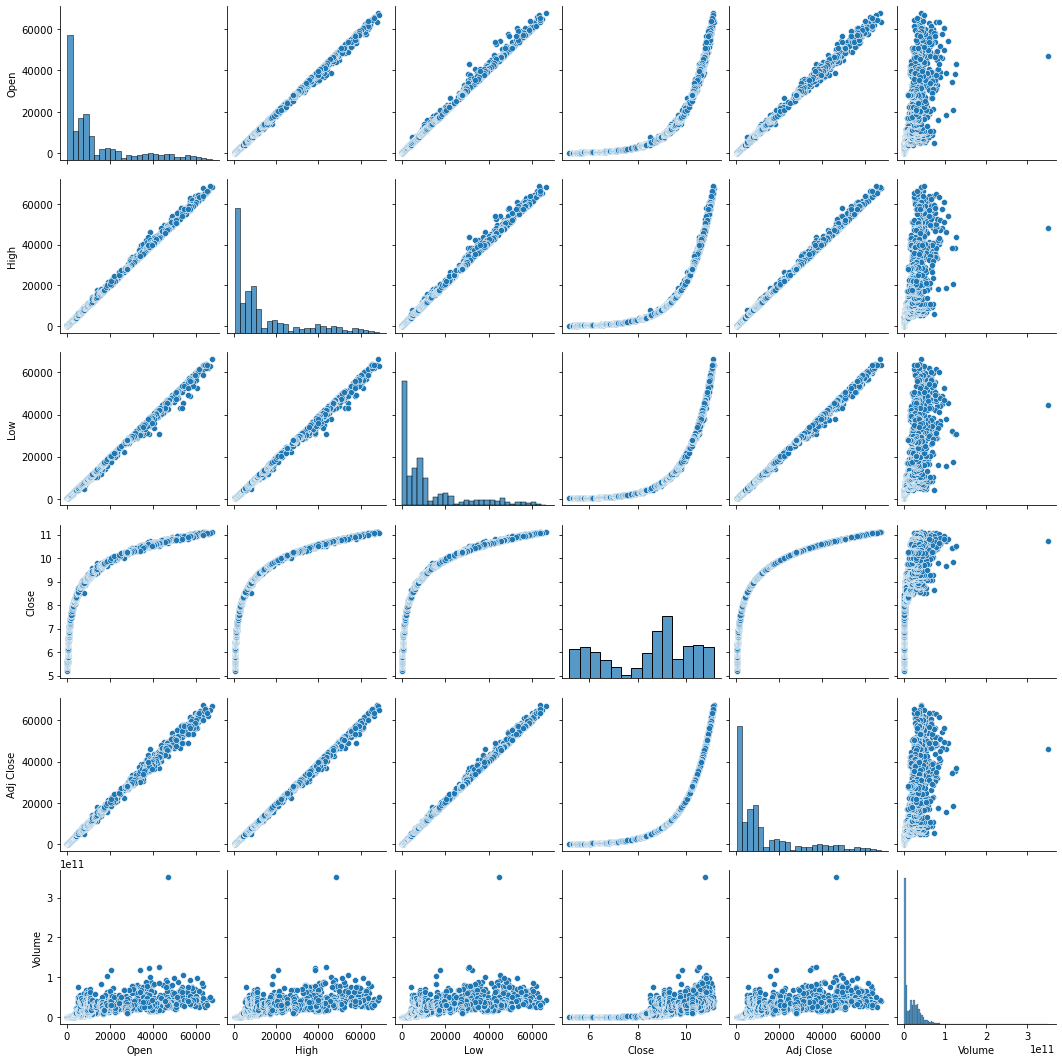

In [18]:
sns.pairplot(dataset)

Introduction of additional variables needed to validate the prediction results.

In [19]:
target_map = dataset['Close'].to_dict()
dataset['BTC+1'] = (dataset.index + pd.Timedelta('1 days')).map(target_map)
#dataset['BTC+2'] = (dataset.index + pd.Timedelta('2 days')).map(target_map)
#dataset['BTC+3'] = (dataset.index + pd.Timedelta('3 days')).map(target_map)
dataset

,Open,High,Low,Close,Adj Close,Volume,BTC+1
Date,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,6.053124,424.440002,34483200,5.980899
2014-09-19,424.102997,427.834991,384.532013,5.980899,394.795990,37919700,6.015923
2014-09-20,394.673004,423.295990,389.882996,6.015923,408.903992,36863600,5.991017
2014-09-21,408.084991,412.425995,393.181000,5.991017,398.821014,26580100,5.999314
2014-09-22,399.100006,406.915985,397.130005,5.999314,402.152008,24127600,6.079455
...,...,...,...,...,...,...,...
2023-04-04,27795.273438,28433.742188,27681.304688,10.245981,28168.089844,15284538859,10.246332
2023-04-05,28169.726563,28739.238281,27843.763672,10.246332,28177.984375,17052315986,10.241571
2023-04-06,28175.226563,28178.384766,27738.759766,10.241571,28044.140625,13837809380,10.237344


In [20]:
dataset['moving_avg'] = dataset['Close'].rolling(window = 20).mean()
dataset['ema_12'] = dataset['Close'].ewm(span = 12, adjust = False).mean()
dataset['ema_26'] = dataset['Close'].ewm(span = 26, adjust = False).mean()
dataset['macd'] = dataset['ema_12'] - dataset['ema_26']
dataset['macd_signal'] = dataset['macd'].ewm(span=9, adjust = False).mean()
delta = dataset['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14).mean()
rs = avg_gain / avg_loss
dataset['rsi'] = 100 - (100 / (1 + rs))
aroon_up = 100 * ((25 - (dataset['Close'].rolling(25).apply(lambda x: x.argmax() + 1))) / 25)
aroon_down = 100 * ((25 - (dataset['Close'].rolling(25).apply(lambda x: x.argmin() + 1))) / 25)
dataset['aroon_oscillator'] = aroon_up - aroon_down

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3125 entries, 2014-09-18 to 2023-04-08
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              3125 non-null   float64
 1   High              3125 non-null   float64
 2   Low               3125 non-null   float64
 3   Close             3125 non-null   float64
 4   Adj Close         3125 non-null   float64
 5   Volume            3125 non-null   int64  
 6   BTC+1             3124 non-null   float64
 7   moving_avg        3106 non-null   float64
 8   ema_12            3125 non-null   float64
 9   ema_26            3125 non-null   float64
 10  macd              3125 non-null   float64
 11  macd_signal       3125 non-null   float64
 12  rsi               3112 non-null   float64
 13  aroon_oscillator  3101 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 430.8 KB


In [22]:
#null = dataset[dataset.isnull().any(axis=1)]
#null

Removal of redundant data.

In [23]:
dataset.drop(['2023-04-06','2023-04-07','2023-04-08'], inplace = True)

In [24]:
dataset.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)

Data visualization for the model (training data and test data).

In [25]:
size = int(len(dataset) * 0.8)
dataset_train = dataset.iloc[:size]
dataset_test = dataset.iloc[size:]

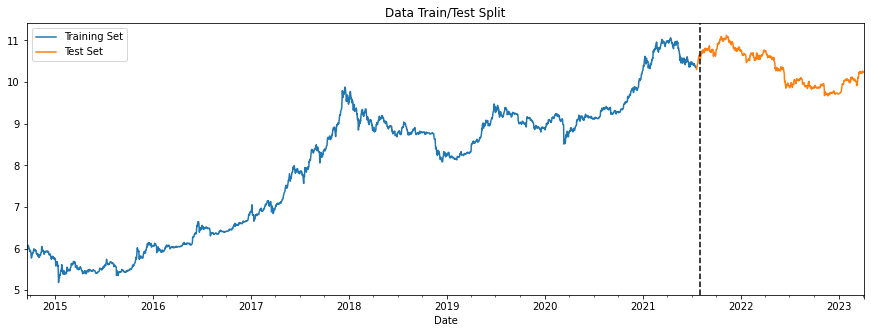

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
dataset_train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
dataset_test['Close'].plot(ax=ax, label='Test Set')
ax.axvline('2021-07-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [27]:
y_train = dataset_train['BTC+1']
y_test = dataset_test['BTC+1']
X_train = dataset_train.drop(['Close', 'BTC+1'], axis =1)
X_test = dataset_test.drop(['Close','BTC+1'], axis = 1)

In [28]:
dataset.head()

,Close,BTC+1,moving_avg,ema_12,ema_26,macd,macd_signal,rsi,aroon_oscillator
Date,,,,,,,,,
2014-09-18,6.053124,5.980899,NaN,6.053124,6.053124,0.000000,0.000000,NaN,NaN
2014-09-19,5.980899,6.015923,NaN,6.042012,6.047774,-0.005762,-0.001152,NaN,NaN
2014-09-20,6.015923,5.991017,NaN,6.037999,6.045415,-0.007416,-0.002405,NaN,NaN
2014-09-21,5.991017,5.999314,NaN,6.030771,6.041385,-0.010614,-0.004047,NaN,NaN
2014-09-22,5.999314,6.079455,NaN,6.025931,6.038269,-0.012338,-0.005705,NaN,NaN


Model training

In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[14:03:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.55091	validation_1-rmse:9.74001
[100]	validation_0-rmse:2.77516	validation_1-rmse:3.52361
[200]	validation_0-rmse:1.02221	validation_1-rmse:1.25192
[300]	validation_0-rmse:0.38046	validation_1-rmse:0.43715
[400]	validation_0-rmse:0.14838	validation_1-rmse:0.16795
[500]	validation_0-rmse:0.07029	validation_1-rmse:0.11724
[569]	validation_0-rmse:0.05282	validation_1-rmse:0.11830


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [30]:
y_pred = reg.predict(X_test)
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

4069.911326722449

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9130640719073323

In [32]:
pred_vs_actual = pd.DataFrame(data = [y_pred, y_test]).T
pred_vs_actual.columns = ['Pred', 'Actual']
pred_vs_actual['Difference'] = pred_vs_actual['Pred'] - pred_vs_actual['Actual']
pred_vs_actual['Date'] = X_test.index + pd.Timedelta('1 days')
pred_vs_actual = pred_vs_actual.set_index('Date')

pred_vs_actual

,Pred,Actual,Difference
Date,,,
2021-07-21,29655.927734,32110.693359,-2454.765625
2021-07-22,30683.574219,32313.105469,-1629.531250
2021-07-23,30547.771484,33581.550781,-3033.779297
2021-07-24,30713.318359,34292.445313,-3579.126954
2021-07-25,31607.466797,35350.187500,-3742.720703
...,...,...,...
2023-04-02,32526.962891,28199.308594,4327.654297
2023-04-03,31746.919922,27790.220703,3956.699219
2023-04-04,31507.457031,28168.089844,3339.367187


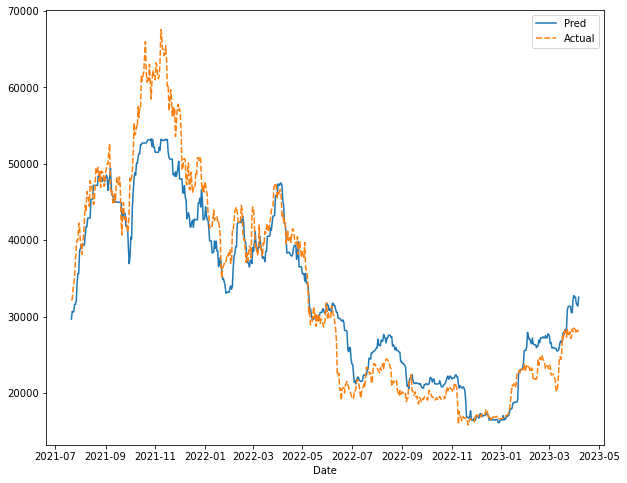

In [33]:
plt.figure(figsize=(10,8))
sns.lineplot(data = pred_vs_actual.drop(['Difference'], axis =1))
plt.show()